In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### Read data

In [31]:
data = pd.read_csv('C:/Users/lisab/OneDrive/Desktop/DA_labs/Week_7/Lesson/learningSet.csv')

C:\Users\lisab\AppData\Local\Temp\ipykernel_23168\911819598.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/lisab/OneDrive/Desktop/DA_labs/Week_7/Lesson/learningSet.csv')


In [58]:
print(data.shape)
#data.head(10)

(95412, 481)


#### Get all categorical columns

In [5]:
categorical = data.select_dtypes(object)
categorical.head()

OSOURCE STATE    ZIP MAILCODE PVASTATE NOEXCH RECINHSE RECP3 RECPGVG  \
0     GRI    IL  61081                        0                          
1     BOA    CA  91326                        0                          
2     AMH    NC  27017                        0                          
3     BRY    CA  95953                        0                          
4            FL  33176                        0        X     X           

  RECSWEEP  ... RFA_21 RFA_22 RFA_23 RFA_24 RFA_2R RFA_2A MDMAUD_R MDMAUD_F  \
0           ...    S4E    S4E    S4E    S4E      L      E        X        X   
1           ...    N1E    N1E           F1E      L      G        X        X   
2           ...           S4D    S4D    S3D      L      E        X        X   
3           ...    A1D    A1D                    L      E        X        X   
4           ...    A3D    I4E    A3D    A3D      L      F        X        X   

  MDMAUD_A GEOCODE2  
0        X        C  
1        X        A  
2        X        C  
3        X        C  
4        X        A  

[5 rows x 74 columns]

#### Check for null values

In [10]:
pd.set_option('display.max_rows', None)
categorical.isna().sum()*100/len(categorical)

OSOURCE     0.000000
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
PVASTATE    0.000000
NOEXCH      0.000000
RECINHSE    0.000000
RECP3       0.000000
RECPGVG     0.000000
RECSWEEP    0.000000
MDMAUD      0.000000
DOMAIN      0.000000
CLUSTER     0.000000
AGEFLAG     0.000000
HOMEOWNR    0.000000
CHILD03     0.000000
CHILD07     0.000000
CHILD12     0.000000
CHILD18     0.000000
GENDER      0.000000
DATASRCE    0.000000
SOLP3       0.000000
SOLIH       0.000000
MAJOR       0.000000
GEOCODE     0.000000
COLLECT1    0.000000
VETERANS    0.000000
BIBLE       0.000000
CATLG       0.000000
HOMEE       0.000000
PETS        0.000000
CDPLAY      0.000000
STEREO      0.000000
PCOWNERS    0.000000
PHOTO       0.000000
CRAFTS      0.000000
FISHER      0.000000
GARDENIN    0.000000
BOATS       0.000000
WALKER      0.000000
KIDSTUFF    0.000000
CARDS       0.000000
PLATES      0.000000
LIFESRC     0.000000
PEPSTRFL    0.000000
RFA_2       0.000000
RFA_3       0.000000
RFA_4       0

##### Just the column GEOCODE2 has null values, but is under the treshold of 85% and will be kept. In the next step all columns will be checked for " " values and replaced by NaN.

In [33]:
categorical['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [34]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [35]:
categorical['MAILCODE'] = categorical['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [37]:
#categorical.head(10)

#### Replace all " " values with NaN

In [38]:
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

In [39]:
categorical.head(10)

OSOURCE STATE     ZIP MAILCODE PVASTATE NOEXCH RECINHSE RECP3 RECPGVG  \
0     GRI    IL   61081        A      NaN      0      NaN   NaN     NaN   
1     BOA    CA   91326        A      NaN      0      NaN   NaN     NaN   
2     AMH    NC   27017        A      NaN      0      NaN   NaN     NaN   
3     BRY    CA   95953        A      NaN      0      NaN   NaN     NaN   
4     NaN    FL   33176        A      NaN      0        X     X     NaN   
5     CWR    AL   35603        A      NaN      0      NaN   NaN     NaN   
6     DRK    IN   46755        A      NaN      0      NaN   NaN     NaN   
7     NWN    LA   70611        A      NaN      0      NaN   NaN     NaN   
8     LIS    IA   51033        A      NaN      0      NaN   NaN     NaN   
9     MSD    TN  37127-        A      NaN      0      NaN   NaN     NaN   

  RECSWEEP MDMAUD DOMAIN CLUSTER AGEFLAG HOMEOWNR CHILD03 CHILD07 CHILD12  \
0      NaN   XXXX     T2      36     NaN      NaN     NaN     NaN     NaN   
1      NaN   XXXX     S1      14       E        H     NaN     NaN     NaN   
2      NaN   XXXX     R2      43     NaN        U     NaN     NaN     NaN   
3      NaN   XXXX     R2      44       E        U     NaN     NaN     NaN   
4      NaN   XXXX     S2      16       E        H     NaN     NaN     NaN   
5      NaN   XXXX     T2      40     NaN      NaN     NaN     NaN     NaN   
6      NaN   XXXX     T2      40       E        H     NaN     NaN       F   
7      NaN   XXXX     T2      39     NaN        U     NaN     NaN     NaN   
8      NaN   XXXX     R2      45     NaN        U     NaN     NaN     NaN   
9      NaN   XXXX     T1      35       I      NaN     NaN     NaN     NaN   

  CHILD18 GENDER DATASRCE SOLP3 SOLIH MAJOR GEOCODE COLLECT1 VETERANS BIBLE  \
0     NaN      F      NaN   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
1       M      M        3   NaN   NaN   NaN       2      NaN      NaN   NaN   
2     NaN      M        3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
3     NaN      F        3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
4     NaN      F        3   NaN    12   NaN     NaN      NaN      NaN     Y   
5     NaN    NaN      NaN   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
6     NaN      F        3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
7     NaN      F        1   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
8     NaN      M        3   NaN   NaN   NaN     NaN      NaN      NaN   NaN   
9     NaN      M      NaN   NaN   NaN   NaN       3      NaN      NaN   NaN   

  CATLG HOMEE PETS CDPLAY STEREO PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS  \
0   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
1   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
2   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
3   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
4     Y   NaN  NaN    NaN      Y      NaN   NaN      Y    NaN        Y   NaN   
5   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
6   NaN   NaN    Y      Y      Y        Y   NaN    NaN    NaN      NaN   NaN   
7   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
8   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   
9   NaN   NaN  NaN    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN   

  WALKER KIDSTUFF CARDS PLATES LIFESRC PEPSTRFL RFA_2 RFA_3 RFA_4 RFA_5 RFA_6  \
0    NaN      NaN   NaN    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   
1    NaN      NaN   NaN    NaN     NaN      NaN   L2G   A2G   A2G   A2G   A2G   
2    NaN      NaN   NaN    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   
3    NaN      NaN   NaN    NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   
4      Y      NaN     Y    NaN       3      NaN   L2F   A2F   A2F   A2F   A1D   
5    NaN      NaN   NaN    NaN     NaN        X   L1F   A1F   A1F   A1F   A1F   
6    NaN  

#### Get a DataFrame with the percentage of NaN values for each column

In [42]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()*100/len(categorical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [57]:
#nulls_percent_df

#### Get just the column with have a percentage of NaN values above 85%

In [44]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>85]
columns_above_threshold['column_name']

4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

#### Get a list with a columns to be dropped

In [45]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


#### Append columns OSOURCE and ZIP, because they should also be dropped although being under the treshold for NaN values

In [46]:
drop_columns_list.append('OSOURCE')
drop_columns_list.append('ZIP')

In [47]:
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'OSOURCE', 'ZIP']


#### Drop all columns in drop_columns_list from the categorical dataset

In [48]:
categorical = categorical.drop(drop_columns_list, axis=1)

In [52]:
categorical.head(10)

STATE MAILCODE NOEXCH MDMAUD DOMAIN CLUSTER AGEFLAG HOMEOWNR GENDER  \
0    IL        A      0   XXXX     T2      36     NaN      NaN      F   
1    CA        A      0   XXXX     S1      14       E        H      M   
2    NC        A      0   XXXX     R2      43     NaN        U      M   
3    CA        A      0   XXXX     R2      44       E        U      F   
4    FL        A      0   XXXX     S2      16       E        H      F   
5    AL        A      0   XXXX     T2      40     NaN      NaN    NaN   
6    IN        A      0   XXXX     T2      40       E        H      F   
7    LA        A      0   XXXX     T2      39     NaN        U      F   
8    IA        A      0   XXXX     R2      45     NaN        U      M   
9    TN        A      0   XXXX     T1      35       I      NaN      M   

  DATASRCE GEOCODE PETS LIFESRC PEPSTRFL RFA_2 RFA_3 RFA_4 RFA_5 RFA_6 RFA_7  \
0      NaN     NaN  NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   
1        3       2  NaN     NaN      NaN   L2G   A2G   A2G   A2G   A2G   A1E   
2        3     NaN  NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4F   
3        3     NaN  NaN     NaN        X   L4E   S4E   S4E   S4E   S4E   S4E   
4        3     NaN  NaN       3      NaN   L2F   A2F   A2F   A2F   A1D   I2D   
5      NaN     NaN  NaN     NaN        X   L1F   A1F   A1F   A1F   A1F   A2F   
6        3     NaN    Y       3        X   L1E   A1E   A1E   NaN   A1E   S2E   
7        1     NaN  NaN     NaN      NaN   L3E   A3E   A3E   A3E   A3E   A3E   
8        3     NaN  NaN     NaN        X   L1F   A1F   A1F   A1F   A1F   S2F   
9      NaN       3  NaN     NaN      NaN   L1F   A1F   A1F   NaN   A1F   A1F   

  RFA_8 RFA_9 RFA_10 RFA_11 RFA_12 RFA_13 RFA_14 RFA_15 RFA_16 RFA_17 RFA_18  \
0   S4E   S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E    S4E   
1   A1E   A1E    A1E    A1E    A1E    NaN    NaN    NaN    L1E    NaN    NaN   
2   S4F   S4F    NaN    S4F    S4F    S4F    S4F    S4F    S4F    NaN    S4D   
3   S4E   S4E    NaN    S4E    S4E    S4E    S4E    S4E    S4E    S2D    S2D   
4   A1E   A1E    L1D    A1E    A1E    L1D    L3D    NaN    L3D    A2D    A2D   
5   A2F   A2F    A2F    A2F    A2F    A2F    A2F    A2F    N3F    N2E    N2E   
6   S2E   S3E    S3E    S3E    S3E    S3E    S2E    NaN    S3E    S2E    S2E   
7   A3E   A3E    A2D    A2D    A2D    A2D    A1D    NaN    N2D    N2D    N2D   
8   S2F   S2F    A1F    A1F    A1F    A1F    A1F    NaN    A1F    A1F    A1F   
9   A1F   A1F    A1F    A1F    A1F    A1F    NaN    NaN    A1E    A1E    A1E   

  RFA_19 RFA_20 RFA_21 RFA_22 RFA_23 RFA_24 RFA_2R RFA_2A MDMAUD_R MDMAUD_F  \
0    S4E    S4E    S4E    S4E    S4E    S4E      L      E        X        X   
1    N1E    N1E    N1E    N1E    NaN    F1E      L      G        X        X   
2    S4D    NaN    NaN    S4D    S4D    S3D      L      E        X        X   
3    A1D    A1D    A1D    A1D    NaN    NaN      L      E        X        X   
4    A3D    A3D    A3D    I4E    A3D    A3D      L      F        X        X   
5    N2E    N2E    N2E    N2E    NaN    F1E      L      F        X        X   
6    A2E    NaN    A2E    A2E    A3E    A3E      L      E        X        X   
7    N2D    N2D    N2D    N2D    NaN    F1D      L      E        X        X   
8    A1F    A1F    A1F    A1F    A1F    A1F      L      F        X        X   
9    N2E    N2E    N2E    N2E    NaN    NaN      L      F        X        X   

  MDMAUD_A GEOCODE2  
0        X        C  
1        X        A  
2        X        C  
3        X        C  
4        X        A  
5        X        C  
6        X        D  
7        X        C  
8        X        D  
9        X        B

In [50]:
categorical.shape

(95412, 43)

#### Working on gender column

##### Replace NaN values first

In [53]:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


##### Reducing number of categories to 'M', 'F' and 'other'

In [54]:
df = pd.DataFrame(categorical['GENDER'].value_counts()).reset_index()

df.columns = ['gender', 'count']
other_genders = list(df[df['count']<2500]['gender'])
def clean_gender(x):
    if x in other_genders:
        return 'other'
    else:
        return x
    
categorical['GENDER'] = list(map(clean_gender, categorical['GENDER']))

In [55]:
print(categorical['GENDER'].value_counts())

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64


## Start of Lab Feature engineering

#### Get all numerical columns

In [59]:
numerical = data.select_dtypes(np.number)

In [60]:
numerical.head(10)

ODATEDW  TCODE   DOB   AGE  NUMCHLD  INCOME  WEALTH1  HIT  MBCRAFT  \
0     8901      0  3712  60.0      NaN     NaN      NaN    0      NaN   
1     9401      1  5202  46.0      1.0     6.0      9.0   16      0.0   
2     9001      1     0   NaN      NaN     3.0      1.0    2      0.0   
3     8701      0  2801  70.0      NaN     1.0      4.0    2      0.0   
4     8601      0  2001  78.0      1.0     3.0      2.0   60      1.0   
5     9401      0     0   NaN      NaN     NaN      NaN    0      NaN   
6     8701      0  6001  38.0      1.0     4.0      6.0    0      NaN   
7     9401      0     0   NaN      NaN     2.0      9.0    1      0.0   
8     8801      1     0   NaN      NaN     3.0      2.0    0      NaN   
9     9401      1  3211  65.0      NaN     NaN      NaN    0      NaN   

   MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  PUBGARDN  PUBCULIN  \
0       NaN      NaN       NaN      NaN     NaN      NaN       NaN       NaN   
1       0.0      3.0       1.0      1.0     1.0      0.0       0.0       0.0   
2       0.0      1.0       0.0      0.0     0.0      0.0       0.0       0.0   
3       0.0      0.0       0.0      0.0     0.0      0.0       0.0       0.0   
4       0.0      9.0       0.0      4.0     1.0      0.0       0.0       0.0   
5       NaN      NaN       NaN      NaN     NaN      NaN       NaN       NaN   
6       NaN      NaN       NaN      NaN     NaN      NaN       NaN       NaN   
7       0.0      0.0       0.0      0.0     0.0      0.0       0.0       0.0   
8       NaN      NaN       NaN      NaN     NaN      NaN       NaN       NaN   
9       NaN      NaN       NaN      NaN     NaN      NaN       NaN       NaN   

   PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP  MALEMILI  MALEVET  VIETVETS  \
0      NaN       NaN       NaN       NaN     NaN         0       39        34   
1      2.0       0.0       3.0       0.0     0.0         0       15        55   
2      1.0       0.0       0.0       0.0     0.0         0       20        29   
3      0.0       0.0       0.0       0.0     1.0         0       23        14   
4      4.0       0.0       1.0       0.0     1.0         1       28         9   
5      NaN       NaN       NaN       NaN     NaN         0       26        36   
6      NaN       NaN       NaN       NaN     NaN         0       33        36   
7      0.0       0.0       0.0       0.0     0.0         0       34        36   
8      NaN       NaN       NaN       NaN     NaN         0       33        27   
9      NaN       NaN       NaN       NaN     NaN         0       28        51   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1      5.0     992     264     332   
1        11         6         2       1      9.0    3611     940     998   
2        33         6         8       1      1.0    7001    2040    2669   
3        31         3         0       3      0.0     640     160     219   
4        53        26         3       2      NaN    2520     627     761   
5        23         7         5       6      NaN   18172    5112    6618   
6        34         7         1       1      3.0    1067     245     348   
7        12         3         3       1      NaN    1485     424     512   
8        42         5         3       2      2.0    2268     622     884   
9        14         5         2       2      9.0    2607     670     899   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   
5       81        0       19       49       51    93     6     1     1     1   
6        0       99        0 

#### Check for null values in the numerical columns

In [114]:
#numerical.isna().sum()*100/len(numerical)

#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

##### GEOCODE2

In [77]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [78]:
#replace NaN values by the most common value A
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [79]:
categorical['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

##### WEALTH1

In [80]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


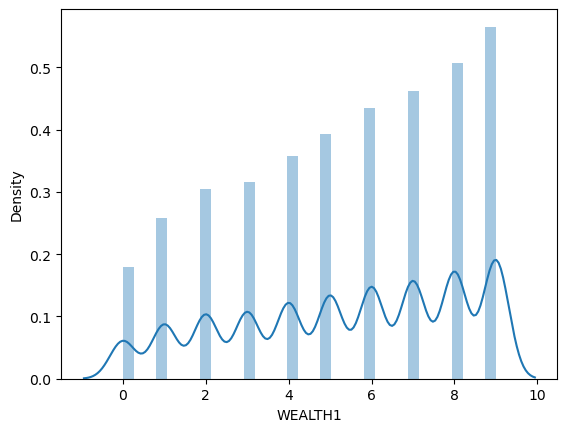

In [81]:
sns.distplot(numerical['WEALTH1'])
plt.show()

In [82]:
numerical['WEALTH1'].median()

6.0

In [83]:
numerical['WEALTH1'].mean()

5.345698500394633

In [84]:
#Replace NaN values by median value for WEALTH1 column
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(6.0)

##### ADI

In [95]:
#numerical['ADI'].value_counts(dropna=False)

In [97]:
numerical['ADI'].value_counts(dropna=False).max()

7428

In [88]:
numerical['ADI'].isna().sum()

132

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


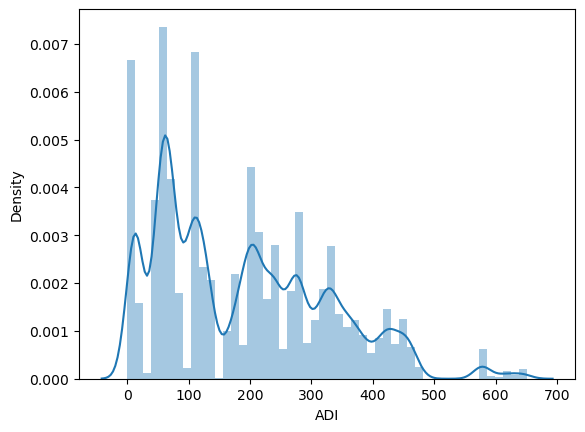

In [86]:
sns.distplot(numerical['ADI'])
plt.show()

In [89]:
numerical['ADI'].mean()

187.35640218303945

In [90]:
numerical['ADI'].median()

175.0

In [94]:
#Replace NaN values by the most frequent one, which is 13
numerical['ADI'] = numerical['ADI'].fillna(13.0)

##### DMA 

In [105]:
#numerical['DMA'].value_counts(dropna=False)

In [99]:
numerical['DMA'].value_counts(dropna=False).max()

7296

In [100]:
numerical['DMA'].isna().sum()

132

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


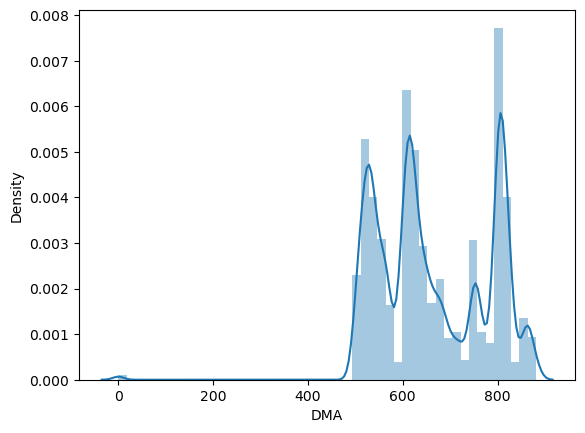

In [101]:
sns.distplot(numerical['DMA'])
plt.show()

In [102]:
numerical['DMA'].mean()

664.0040722082284

In [103]:
numerical['DMA'].median()

635.0

In [106]:
#Replace NaN values by the most frequent one, which is 803
numerical['DMA'] = numerical['DMA'].fillna(803.0)

##### MSA

In [112]:
#numerical['MSA'].value_counts(dropna=False)

In [109]:
numerical['MSA'].value_counts(dropna=False).max()

21333

In [110]:
numerical['MSA'].isna().sum()

132

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


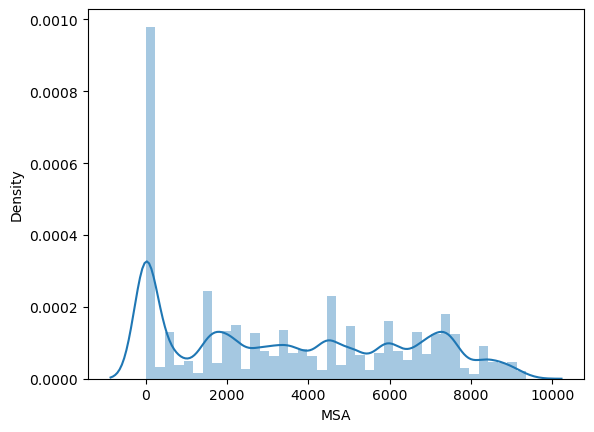

In [111]:
sns.distplot(numerical['MSA'])
plt.show()

In [113]:
#Replace NaN values by the most frequent one, which is 0
numerical['MSA'] = numerical['MSA'].fillna(0.0)

#### Dealing with the rest of the NaN columns in the numerical data

In [115]:
numerical = numerical.apply(lambda x: x.replace(" ", np.NaN))

In [116]:
numerical.head()

ODATEDW  TCODE   DOB   AGE  NUMCHLD  INCOME  WEALTH1  HIT  MBCRAFT  \
0     8901      0  3712  60.0      NaN     NaN      6.0    0      NaN   
1     9401      1  5202  46.0      1.0     6.0      9.0   16      0.0   
2     9001      1     0   NaN      NaN     3.0      1.0    2      0.0   
3     8701      0  2801  70.0      NaN     1.0      4.0    2      0.0   
4     8601      0  2001  78.0      1.0     3.0      2.0   60      1.0   

   MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  PUBGARDN  PUBCULIN  \
0       NaN      NaN       NaN      NaN     NaN      NaN       NaN       NaN   
1       0.0      3.0       1.0      1.0     1.0      0.0       0.0       0.0   
2       0.0      1.0       0.0      0.0     0.0      0.0       0.0       0.0   
3       0.0      0.0       0.0      0.0     0.0      0.0       0.0       0.0   
4       0.0      9.0       0.0      4.0     1.0      0.0       0.0       0.0   

   PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP  MALEMILI  MALEVET  VIETVETS  \
0      NaN       NaN       NaN       NaN     NaN         0       39        34   
1      2.0       0.0       3.0       0.0     0.0         0       15        55   
2      1.0       0.0       0.0       0.0     0.0         0       20        29   
3      0.0       0.0       0.0       0.0     1.0         0       23        14   
4      4.0       0.0       1.0       0.0     1.0         1       28         9   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1      5.0     992     264     332   
1        11         6         2       1      9.0    3611     940     998   
2        33         6         8       1      1.0    7001    2040    2669   
3        31         3         0       3      0.0     640     160     219   
4        53        26         3       2      NaN    2520     627     761   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
1     4     2     6     4     14      0      0      2      0      1      4   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
4     0     0     0     0      0      0      0      0      0      0      0   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
1     21     13     14     33     23     10      4      2      11      16   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
4     23     14     21     13     15     20     12      5      13      15   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
1      36      22      15      12       1       5     4    21    75    55   
2      30      22      19      25      10   

In [117]:
nulls_percent_df_num = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index()
nulls_percent_df_num.columns = ['column_name', 'nulls_percentage']

In [119]:
#nulls_percent_df_num

#### all numerical columns with a percentage above 85% for NaN values

In [120]:
columns_above_threshold_num = nulls_percent_df_num[nulls_percent_df_num['nulls_percentage']>85]
columns_above_threshold_num['column_name']

4       NUMCHLD
344     RDATE_3
345     RDATE_4
346     RDATE_5
347     RDATE_6
348     RDATE_7
351    RDATE_10
354    RDATE_13
356    RDATE_15
358    RDATE_17
361    RDATE_20
362    RDATE_21
364    RDATE_23
366     RAMNT_3
367     RAMNT_4
368     RAMNT_5
369     RAMNT_6
370     RAMNT_7
373    RAMNT_10
376    RAMNT_13
378    RAMNT_15
380    RAMNT_17
383    RAMNT_20
384    RAMNT_21
386    RAMNT_23
Name: column_name, dtype: object

In [121]:
drop_columns_list_num = list(columns_above_threshold_num['column_name'])
print(drop_columns_list_num)

['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


#### Drop all numerical columns with NaN values above 85%

In [122]:
numerical = numerical.drop(drop_columns_list_num, axis=1)

In [123]:
numerical.head()

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MBCRAFT  MBGARDEN  \
0     8901      0  3712  60.0     NaN      6.0    0      NaN       NaN   
1     9401      1  5202  46.0     6.0      9.0   16      0.0       0.0   
2     9001      1     0   NaN     3.0      1.0    2      0.0       0.0   
3     8701      0  2801  70.0     1.0      4.0    2      0.0       0.0   
4     8601      0  2001  78.0     3.0      2.0   60      1.0       0.0   

   MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  PUBGARDN  PUBCULIN  PUBHLTH  \
0      NaN       NaN      NaN     NaN      NaN       NaN       NaN      NaN   
1      3.0       1.0      1.0     1.0      0.0       0.0       0.0      2.0   
2      1.0       0.0      0.0     0.0      0.0       0.0       0.0      1.0   
3      0.0       0.0      0.0     0.0      0.0       0.0       0.0      0.0   
4      9.0       0.0      4.0     1.0      0.0       0.0       0.0      4.0   

   PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP  MALEMILI  MALEVET  VIETVETS  \
0       NaN       NaN       NaN     NaN         0       39        34   
1       0.0       3.0       0.0     0.0         0       15        55   
2       0.0       0.0       0.0     0.0         0       20        29   
3       0.0       0.0       0.0     1.0         0       23        14   
4       0.0       1.0       0.0     1.0         1       28         9   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1      5.0     992     264     332   
1        11         6         2       1      9.0    3611     940     998   
2        33         6         8       1      1.0    7001    2040    2669   
3        31         3         0       3      0.0     640     160     219   
4        53        26         3       2      NaN    2520     627     761   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
1     4     2     6     4     14      0      0      2      0      1      4   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
4     0     0     0     0      0      0      0      0      0      0      0   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
1     21     13     14     33     23     10      4      2      11      16   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
4     23     14     21     13     15     20     12      5      13      15   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
1      36      22      15      12       1       5     4    21    75    55   
2      30      22      19      25      10      23    21    35    44    22   
3      30      14    

In [124]:
numerical.shape

(95412, 382)